### (Execute if your running in Binder)

In [ ]:
# Uncomment these lines

# !pip install pandas
# !pip install openpyxl
# !pip install networkx

# Exploring HS Correlation Tables

In [2]:
import pandas as pd
import os
from pathlib import Path
import platform
import networkx as nx

HSTABLES = "https://unstats.un.org/unsd/trade/classifications/tables/CompleteCorrelationsOfHS-SITC-BEC_20170606.xlsx"
HS = ['HS92', 'HS96', 'HS02', 'HS07', 'HS12', 'HS17'] #should be updated if changed

data = pd.read_excel(HSTABLES,
                     usecols= HS,
                     dtype = {v:'object' for v in HS}).dropna().drop_duplicates()

for col in HS: 
    data[col] = data[col].apply(lambda x: col+"-"+str(int(x)).zfill(6))
connections = []
for i in range(len(HS)-1): 
        temp_tup_list = list(data[[HS[i], HS[i+1]]].drop_duplicates().itertuples(index=False, name=None))
        connections = connections + temp_tup_list
        
G = nx.Graph()
G.add_edges_from(connections)

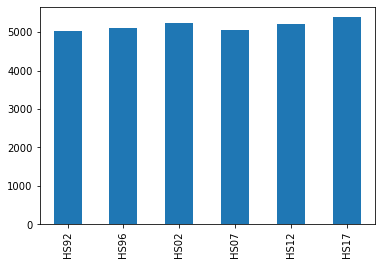

In [11]:
# Number of distinct positions by version
import matplotlib.pyplot as plt

data.nunique().plot(kind='bar'); plt.show()

In [12]:
# Number of homogeneous positions
len(list(nx.connected_components(G)))

3832

In [13]:
# Number of positions with 1:1 relations between all versions
len([x for x in list(nx.connected_components(G)) if len(x)==6])

3328

In [14]:
# Number of positions with more than 1 position in at least one version
len([x for x in list(nx.connected_components(G)) if len(x)>6])

504

In [15]:
from statistics import mean, median

# Average number of connected positions
mean([len(x) for x in list(nx.connected_components(G))])

8.09159707724426

In [16]:
# Median number of connected positions
median([len(x) for x in list(nx.connected_components(G))])

6.0